<a href="https://colab.research.google.com/github/GonzalezJulianBautista/Data-Science-Portfolio/blob/main/AN%C3%81LISIS_Y_VISUALIZACI%C3%93N_DE_DATOS_(PYTHON)_EMERGENCY_911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANÁLISIS Y VISUALIZACIÓN DE DATOS (PYTHON) - Registro de llamadas 911 (Montgomery County, Pensilvania) - Julián Bautista González**

**Contenido:** 

* Presentación
* Carga de datos 
* Interpretación de datos
* Análisis de datos: 
  * Sección 1: Preguntas Iniciales
  * Sección 2: Mapas de calor
  * Sección 3: Accidentes vehiculares y Lower Merion en detalle
* Conclusiones 


## **PRESENTACIÓN**

Presentamos el proyecto, la metodología, el contexto y los objetivos. 

* **Análisis y Visualización de datos**

A continuación, se realizarán las tareas de análisis y visualización de un dataset: **Emergency - 911 calls**.

* **Fuente de los datos**

El dataset se extraerá directamente de un [repositorio Github](https://github.com/KunalArora/Emergency-911-calls-kaggle) que contiene un archivo csv con los datos. 

* **Contenido**

El dataset, extraído en formato csv, contiene los registros de las llamadas de emergencia (911) por fuego, tráfico y emergencia médica en Montgomery County, Pensilvania. 


* **Objetivo**

El objetivo del siguiente proyecto será realizar las tareas de análisis de los datos de ambos datasets, a la vez que se plasma el desarrollo, segmento por segmento y de la forma más clara y concisa posible.
Esto lo haremos de dos maneras:

  * **desde el punto de vista técnico y práctico:** utilizando herramientas y librerías de explotación de datos importados directamente a Python.

  * **desde el punto de vista expositivo:** complementando las celdas de código con celdas de texto y comentarios a lo largo de todo el proceso, además de realizar la adecuada división en segmentos del notebook, para un mejor seguimiento de la metodología de trabajo. 

* **¿Por qué analizamos los datos?**

El sentido de este notebook es exhibir la potencia de análisis que Python, a través de sus librerías, pone en manos del científico de datos. Se intentará a lo largo del notebook responder una variedad de preguntas relacionadas al dataset buscando **agregar valor** a los datos del mismo. Al tratarse de datos pertenecientes al departamento de policía de un condado, algunas de las preguntas y/o problemáticas que podemos abordar son: 

1. ¿Qué épocas del año presentan el mayor número de llamadas a la policía? 

2. ¿Algún mes, día u horario se destaca por su cantidad de llamados de emergencia?

3. ¿Cómo están distribuidas las llamadas a razón de los motivos de las mismas? ¿Y a lo largo del tiempo?

4. ¿Cuáles son las mayores causas de llamados a la policía?

De esta forma, intentaremos obtener conclusiones certeras que busquen ayudar al departamento de policía de Montogomery County en el hipotético caso de que se requiera de nuestro análisis. 



## **CARGA DE DATOS**

Extraemos los datos e importamos las librerías a utilizar.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')
sns.set(rc={'axes.facecolor':'darkgray', 'figure.facecolor':'lightgrey'})
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KunalArora/Emergency-911-calls-kaggle/master/911_full.csv', delimiter = ',' )

* df: DataFrame que contiene los registros de llamados al 911 en Montgomery County, PA.

## **INTERPRETACIÓN DE DATOS**

Realizamos una interpretación de los datos y las transformaciones convenientes para el trabajo. 


Consultamos con el método .info un primer pantallazo del dataset. Vemos que contamos con aproximadamente 423 mil entradas en 9 columnas. 



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        423909 non-null  float64
 1   lng        423909 non-null  float64
 2   desc       423909 non-null  object 
 3   zip        371780 non-null  float64
 4   title      423909 non-null  object 
 5   timeStamp  423909 non-null  object 
 6   twp        423750 non-null  object 
 7   addr       423909 non-null  object 
 8   e          423909 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


Revisamos con el método .head() cómo se ve nuestro DataFrame

In [4]:
df.head(15)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


Podemos describir las variables de nuestro dataframe como: 

* lat : Latitud de la llamada, texto. 
* lng: Longitud de la llamada, texto.
* desc: Descripción de la llamada de emergencia, texto.
* zip: zipcode, texto.
* title: Título encabezado por 'Traffic', 'Fire' o 'EMS', texto.
* timeStamp: YYYY-MM-DD HH:MM:SS, texto.
* twp: Municipio, texto.
* addr: Dirección, texto.
* e: Variable que parece tomar siempre el valor 1.

Una vez que estamos en contexto y sabemos con qué datos estamos trabajando, realizamos unas rápidas transformaciones que van a facilitarnos el trabajo más adelante. 

1. Extraemos de la columna que contiene el título el código del motivo. El análisis será respaldado por un componente de visualización, con lo cuál, mientras más podamos agrupar más rico será el mismo. La nueva columna se llamará 'motivo'.

In [5]:
df['motivo'] = df['title'].apply(lambda title: title.split(':')[0])

2. Transformamos la columna 'timestamp' de tipo texto a tipo datetime, para que se pueda explotar la misma al máximo. 

In [6]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

3. Habiendo transformado a datetime la columna 'timestamp', extraemos 4 nuevas columnas: 'hora', 'mes', 'día_semana' y 'fecha', respectivamente. 

In [7]:
df['hora'] = df['timeStamp'].apply(lambda time: time.hour)
df['mes'] = df['timeStamp'].apply(lambda time: time.month)
df['dia'] = df['timeStamp'].apply(lambda time: time.day)
df['dia_semana'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['fecha']=df['timeStamp'].apply(lambda t: t.date())

Asignamos a los valores numéricos del día de la semana, sus respectivos nombres. 

In [8]:
dmap = {0:'lun',1:'mar',2:'mie',3:'jue',4:'vie',5:'sab',6:'dom'}
df['dia_semana'] = df['dia_semana'].map(dmap)

El dataframe está listo para su explotación. 

In [9]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,motivo,hora,mes,dia,dia_semana,fecha
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,10,jue,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,10,jue,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,10,jue,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,10,jue,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,10,jue,2015-12-10


## **ANÁLISIS DE DATOS**

Una vez listo el dataframe, explotamos los datos. 

### **SECCIÓN 1: Preguntas Iniciales**

En este primer segmento, trataremos de abordar preguntas concretas referentes a la distribución de las llamadas en relación a las diferentes variables disponibles. 

Al tratarse de variables que van a ser agrupadas, los gráficos de barras van a ser de gran ayuda para visualizar los insights obtenidos. 
 





#### **¿Cómo se distribuyen los llamados a lo largo de la semana? ¿Y sesgando por motivo?** 

In [12]:
order = ["lun", "mar", "mie", "jue", "vie", "sab", "dom"]
hue_order = ["EMS", "Traffic", "Fire"]

No handles with labels found to put in legend.


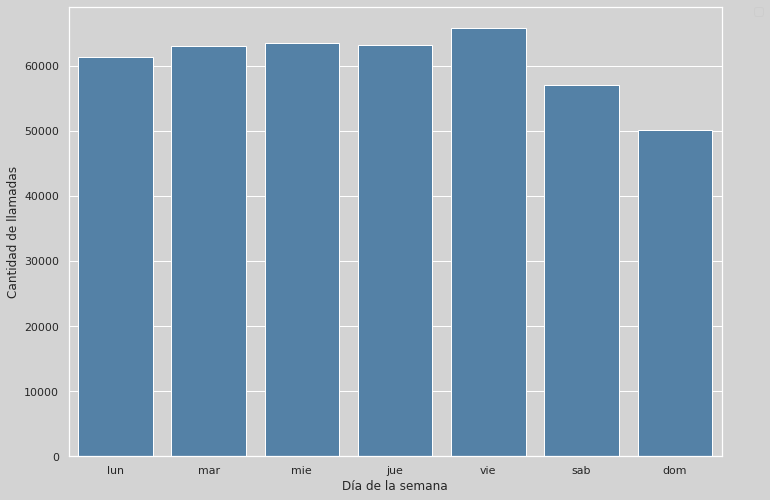

In [92]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.countplot(x='dia_semana',data=df,color='steelblue', order = order )
ax.set(xlabel='Día de la semana', ylabel='Cantidad de llamadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

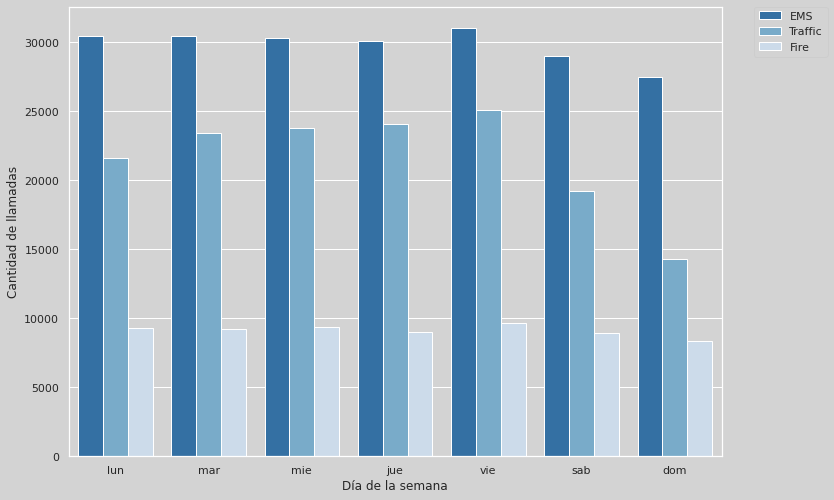

In [93]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x='dia_semana',data=df,palette='Blues_r', hue = 'motivo', order=order, hue_order = hue_order )
ax.set(xlabel='Día de la semana', ylabel='Cantidad de llamadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Para los motivos de emergencia y tráfico, se observa una distribución pareja de los llamados durante los días de semana (lunes a viernes), con una leve reducción los fines de semana.

 Para incendios, la distribución es similar toda la semana. Los viernes son los días donde más llamados recibe el Departamento. 

#### **Distribución mensual de los llamados**

No handles with labels found to put in legend.


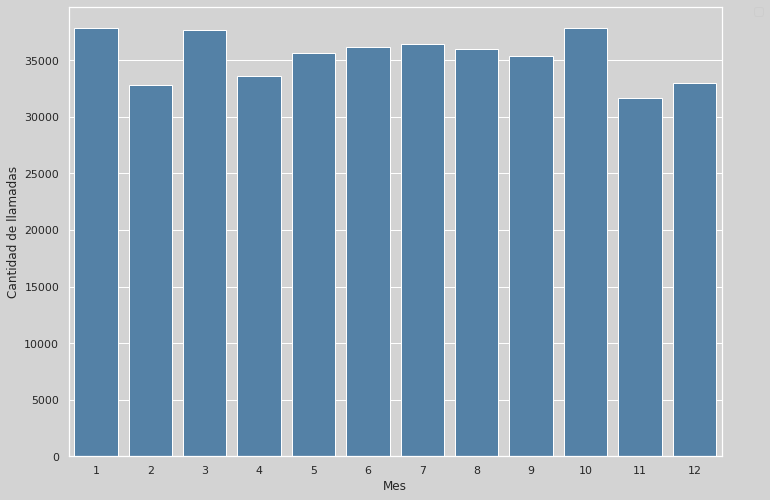

In [94]:

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.countplot(x='mes',data=df,color='steelblue' )
ax.set(xlabel='Mes', ylabel='Cantidad de llamadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

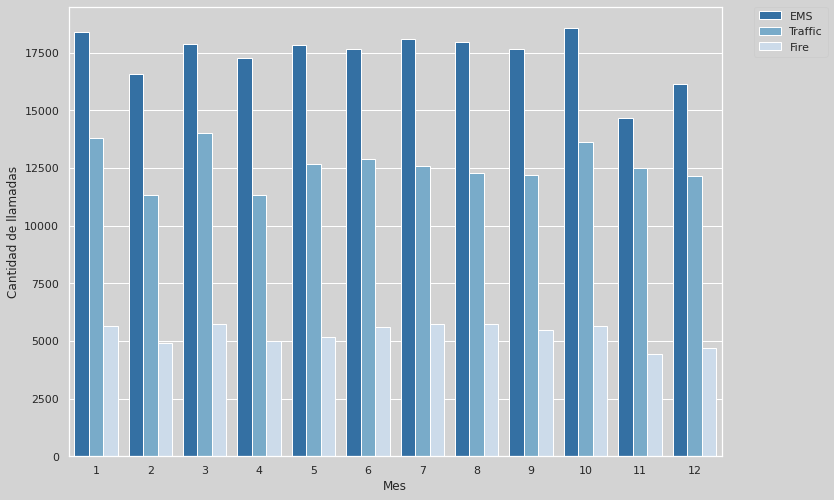

In [95]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.countplot(x='mes',data=df,palette='Blues_r', hue = 'motivo', hue_order = hue_order)
ax.set(xlabel='Mes', ylabel='Cantidad de llamadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Enero, marzo y octubre son los meses donde más llamadas se reciben. En estos meses se encuentran los picos de llamados por los 3 motivos (EMS, Traffic, Fire).

#### **Distribución horaria de los llamados**

No handles with labels found to put in legend.


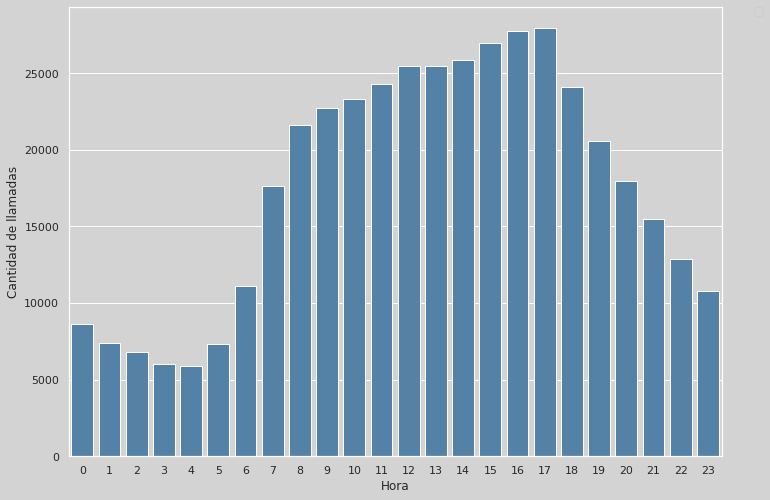

In [96]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.countplot(x='hora',data=df,color='steelblue' )
ax.set(xlabel='Hora', ylabel='Cantidad de llamadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

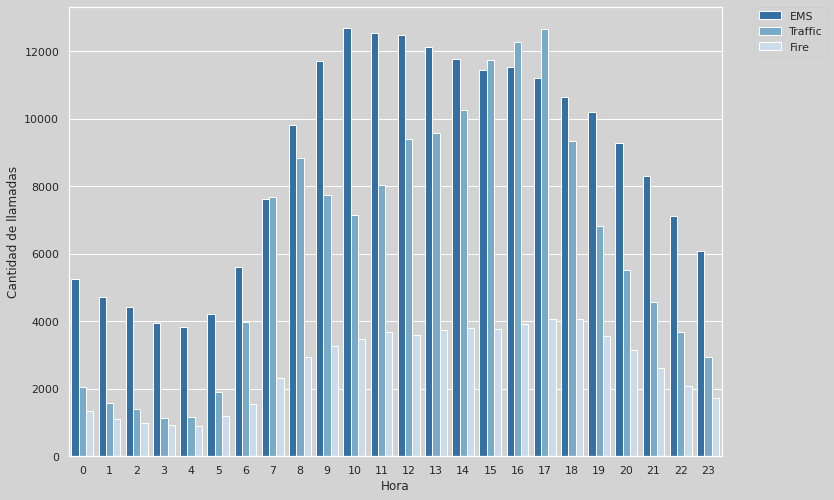

In [97]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x='hora',data=df,hue='motivo',palette='Blues_r', hue_order=hue_order)
ax.set(xlabel='Hora', ylabel='Cantidad de llamadas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Entre las 9hs y las 19hs los llamados exceden la cifra de 10.000, mientras que para emergencias médicas su pico está entre las 9hs y las 12hs.
 Tráfico tiene su pico entre las 16hs y 17hs. 

#### **¿Cuál es el motivo más frecuente de llamados de emergencia?**

In [98]:
df_motivo = pd.DataFrame(df['motivo'].value_counts(normalize = True).head(3))
df_motivo.rename(columns = {'motivo':'Cantidad (%)'}, inplace = True)
df_motivo.reset_index(level=0, inplace=True)
df_motivo.rename(columns = {'index':'Motivo', 'title':'Cantidad'}, inplace = True)
df_motivo.style.background_gradient(cmap='Blues')

,Motivo,Cantidad (%)
0,EMS,0.492266
1,Traffic,0.357289
2,Fire,0.150445


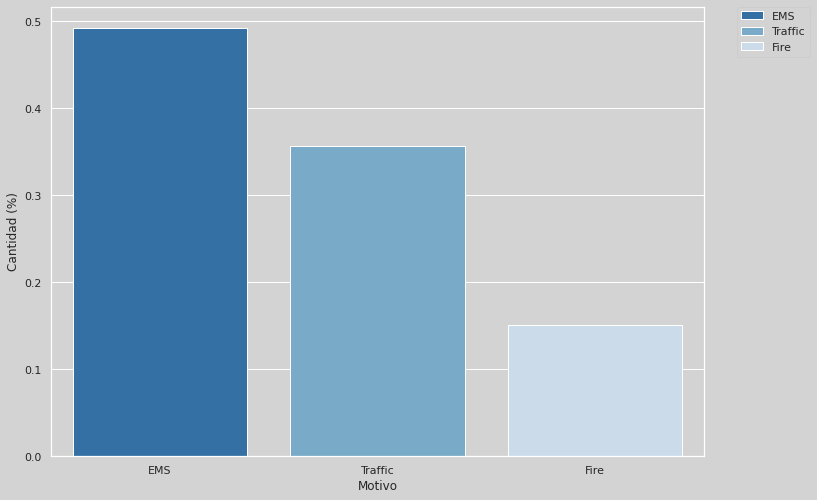

In [101]:
from matplotlib import pyplot
import seaborn

sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x= 'Motivo', y='Cantidad (%)',data=df_motivo,hue='Motivo',palette='Blues_r', dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=.0)

Las llamadas por emergencia médica ocupan casi la mitad de los llamados, seguidas por situaciones de tráfico con un 40% sobre el total. 

#### **En detalle: Proporción por título (General)**

In [19]:
df_detalle = df["motivo"]
df_detalle = pd.DataFrame(df['title'].value_counts(normalize = True).head(10))
df_detalle.reset_index(level=0, inplace=True)
df_detalle.rename(columns = {'index':'Motivo', 'title':'Cantidad (%)'}, inplace = True)
df_detalle.style.background_gradient(cmap='Blues')

,Motivo,Cantidad (%)
0,Traffic: VEHICLE ACCIDENT -,0.232128
1,Traffic: DISABLED VEHICLE -,0.075184
2,Fire: FIRE ALARM,0.057512
3,EMS: FALL VICTIM,0.050136
4,EMS: RESPIRATORY EMERGENCY,0.049912
5,EMS: CARDIAC EMERGENCY,0.048633
6,EMS: VEHICLE ACCIDENT,0.039933
7,Traffic: ROAD OBSTRUCTION -,0.033342
8,EMS: SUBJECT IN PAIN,0.028310
9,EMS: HEAD INJURY,0.026190


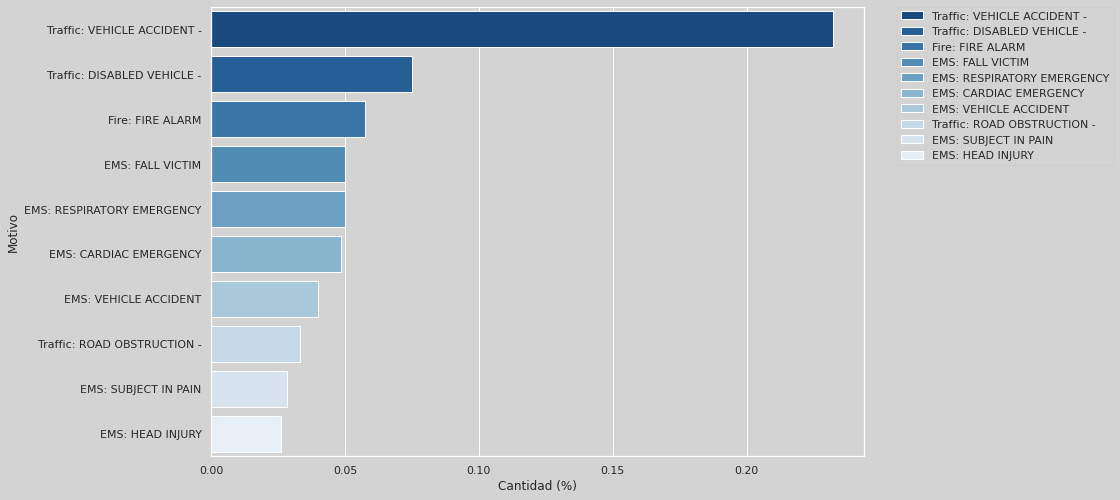

In [20]:
from matplotlib import pyplot
import seaborn

sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x= 'Cantidad (%)', y='Motivo',data=df_detalle,hue='Motivo',palette='Blues_r', dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=.0)

Los accidentes vehiculares, que pertenecen al motivo de tráfico, ocupan un 25% de las llamadas al departamento. 

#### **En detalle: Proporción por título (EMS)**

In [21]:
df_EMS = df[df["motivo"]=='EMS']
df_EMS_detalle = pd.DataFrame(df_EMS['title'].value_counts(normalize = True).head(10))
df_EMS_detalle.reset_index(level=0, inplace=True)
df_EMS_detalle.rename(columns = {'index':'Motivo', 'title':'Cantidad (%)'}, inplace = True)
df_EMS_detalle.style.background_gradient(cmap='Blues')

,Motivo,Cantidad (%)
0,EMS: FALL VICTIM,0.101847
1,EMS: RESPIRATORY EMERGENCY,0.101392
2,EMS: CARDIAC EMERGENCY,0.098794
3,EMS: VEHICLE ACCIDENT,0.081121
4,EMS: SUBJECT IN PAIN,0.057510
5,EMS: HEAD INJURY,0.053202
6,EMS: UNKNOWN MEDICAL EMERGENCY,0.034359
7,EMS: SYNCOPAL EPISODE,0.033952
8,EMS: GENERAL WEAKNESS,0.033875
9,EMS: SEIZURES,0.033286


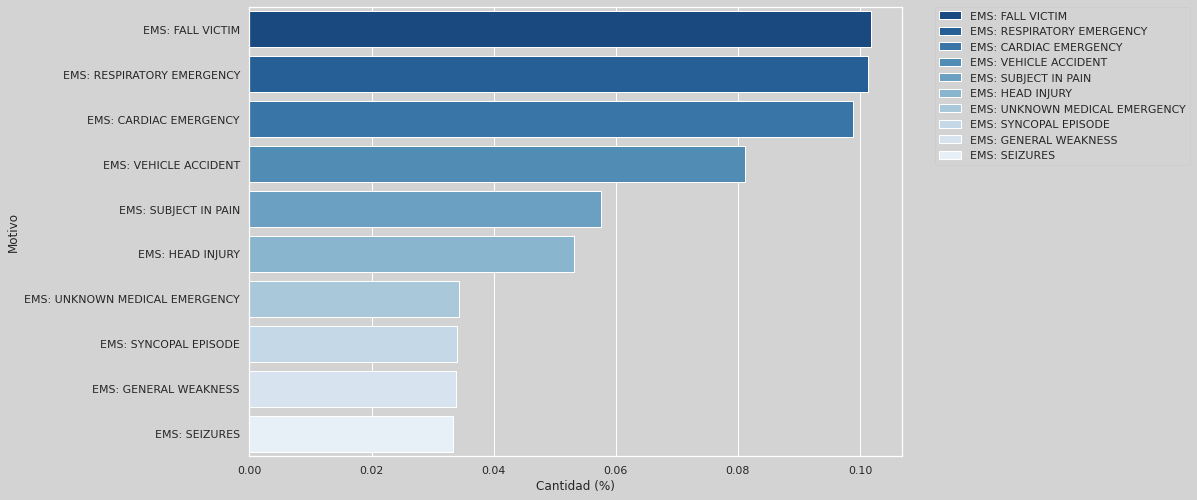

In [22]:
from matplotlib import pyplot
import seaborn

sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x= 'Cantidad (%)', y='Motivo',data=df_EMS_detalle,hue='Motivo',palette='Blues_r', dodge=False,)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=.0)

Las caídas y fallas cardiorespiratorias, ocupan casi el 30% de las llamadas al departamento por motivo de EMS. 

#### **En detalle: Proporción por título (Traffic)**

In [23]:
df_Traffic = df[df["motivo"]=='Traffic']
df_Traffic_detalle = pd.DataFrame(df_Traffic['title'].value_counts(normalize = True).head(5))
df_Traffic_detalle.reset_index(level=0, inplace=True)
df_Traffic_detalle.rename(columns = {'index':'Motivo', 'title':'Cantidad (%)'}, inplace = True)
df_Traffic_detalle.style.background_gradient(cmap='Blues')

,Motivo,Cantidad (%)
0,Traffic: VEHICLE ACCIDENT -,0.649692
1,Traffic: DISABLED VEHICLE -,0.210428
2,Traffic: ROAD OBSTRUCTION -,0.093320
3,Traffic: HAZARDOUS ROAD CONDITIONS -,0.029018
4,Traffic: VEHICLE FIRE -,0.015093


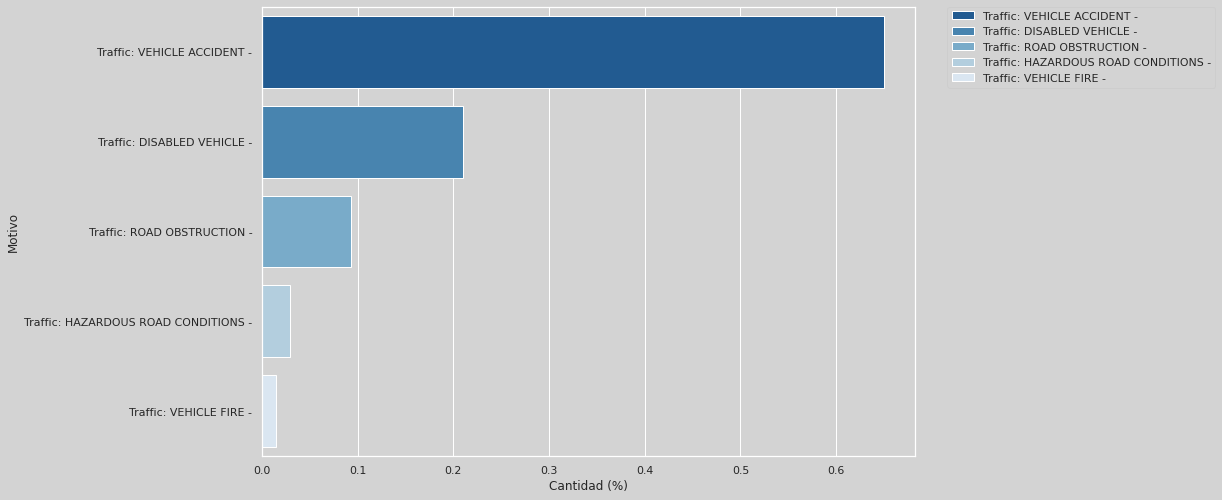

In [24]:
from matplotlib import pyplot
import seaborn

sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x= 'Cantidad (%)', y='Motivo',data=df_Traffic_detalle,hue='Motivo',palette='Blues_r', dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=.0)

#### **En detalle: Proporción por título (Fire)**

In [25]:
df_Fire = df[df["motivo"]=='Fire']
df_Fire_detalle = pd.DataFrame(df_Fire['title'].value_counts(normalize = True).head(10))
df_Fire_detalle.reset_index(level=0, inplace=True)
df_Fire_detalle.rename(columns = {'index':'Motivo', 'title':'Cantidad (%)'}, inplace = True)
df_Fire_detalle.style.background_gradient(cmap='Blues')

,Motivo,Cantidad (%)
0,Fire: FIRE ALARM,0.382281
1,Fire: VEHICLE ACCIDENT,0.112160
2,Fire: FIRE INVESTIGATION,0.093375
3,Fire: GAS-ODOR/LEAK,0.067487
4,Fire: ELECTRICAL FIRE OUTSIDE,0.048687
5,Fire: BUILDING FIRE,0.047464
6,Fire: FIRE SPECIAL SERVICE,0.038134
7,Fire: CARBON MONOXIDE DETECTOR,0.037460
8,Fire: VEHICLE FIRE,0.034387
9,Fire: WOODS/FIELD FIRE,0.025684


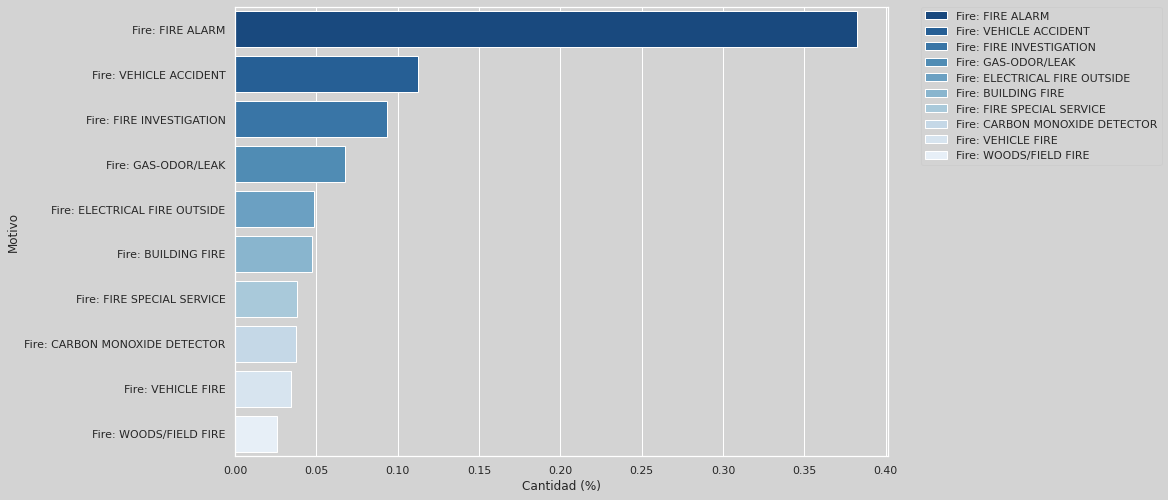

In [26]:
from matplotlib import pyplot
import seaborn

sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x= 'Cantidad (%)', y='Motivo',data=df_Fire_detalle,hue='Motivo',palette='Blues_r', dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=.0)

Las alarmas de incendio, ocupan un 36% de las llamadas al departamento por motivo de fuego. 

#### **Distribución geográfica**

In [104]:
df['zip'].value_counts().head(5)

df_zip = pd.DataFrame(df['zip'].value_counts(normalize = True).head(10))
df_zip.rename(columns = {'zip':'Top 5 Zipcodes'}, inplace = True)
df_zip.style.background_gradient(cmap='Blues')

,Top 5 Zipcodes
19401.0,0.077078
19464.0,0.075173
19403.0,0.058182
19446.0,0.055129
19406.0,0.037918
19002.0,0.035989
19468.0,0.033334
19046.0,0.031524
19454.0,0.030817
19090.0,0.029988


Los 10 zipcodes que registran más llamadas equivalen al 40% de las llamadas al departamento, es un dato llamativo teniendo en cuenta que el dataframe incluye datos de 170 zipcodes.

In [79]:
df['twp'].value_counts().head(5)

df_twp = pd.DataFrame(df['twp'].value_counts(normalize = True).head(10))
df_twp.reset_index(level=0, inplace=True)
df_twp.rename(columns = {'twp':'Cantidad (%)', 'index': 'Municipio'}, inplace = True)
df_twp.style.background_gradient(cmap='Blues')

,Municipio,Cantidad (%)
0,LOWER MERION,0.085996
1,ABINGTON,0.060968
2,NORRISTOWN,0.056361
3,UPPER MERION,0.053555
4,CHELTENHAM,0.046322
5,POTTSTOWN,0.041298
6,UPPER MORELAND,0.034707
7,LOWER PROVIDENCE,0.033097
8,PLYMOUTH,0.030206
9,UPPER DUBLIN,0.028106


Para los municipios, la distribución se repite, los 10 municipios con más llamadas ocupan el 43% de las llamadas al departamento. El dataframe cuenta con información de 69 municipios.

### **SECCIÓN 2: Mapas de calor** 

Una gran parte de la labor de los miembros de un departamento de policía es la de patrullar. Usualmente, los departamentos planifican sistemas de rotación, donde se tienen en cuenta una multiplicidad de variables. 

Considerando que tenemos disponibles la distribución temporal de los llamados, los mapas de calor nos van a ser de gran ayuda, proporcionándonos de forma explícita información sobre los períodos de tiempo que el departamento de policía de Montgomery County tendría que tener más presentes. 

Primero, preparamos los dataframes agrupados con los cuales vamos a poder graficar. 

In [30]:
byMonth = df.groupby('mes').count()
WeekHour = df.groupby(by=['dia_semana','hora']).count()['motivo'].unstack()
WeekHour = WeekHour.reindex(['lun', 'mar', 'mie', 'jue', 'vie', 'sab', 'dom'])
DayHour = df.groupby(by=['dia','hora']).count()['motivo'].unstack()
MonthDay = df.groupby(by=['mes','dia']).count()['motivo'].unstack()
dayMonth = df.groupby(by=['mes', 'dia_semana']).count()['motivo'].unstack()

#### **Días de la semana x Hora** 

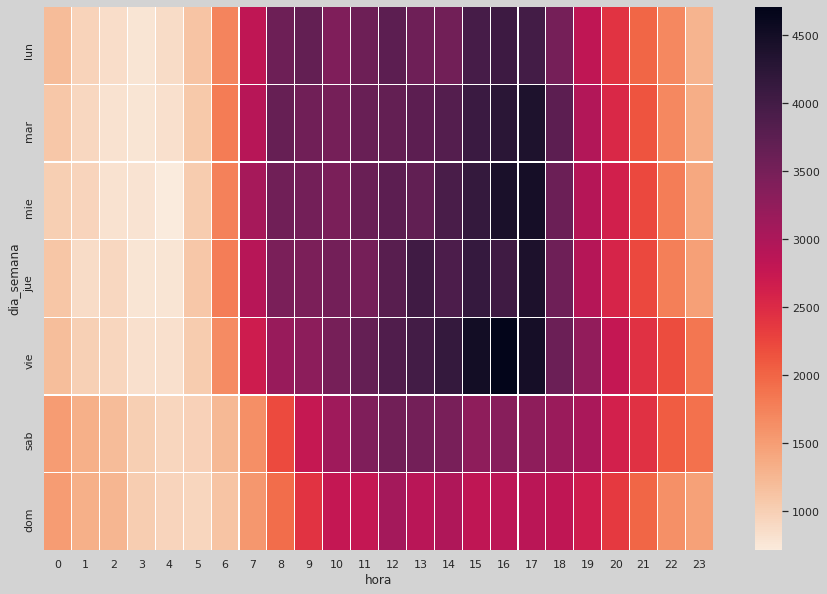

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(WeekHour,cmap='rocket_r', linewidths=.1, xticklabels='auto', yticklabels='auto')

La mayoría de las llamadas suelen darse durante el día, entre las 8hs y 18hs. 

#### **Días del mes x Hora** 

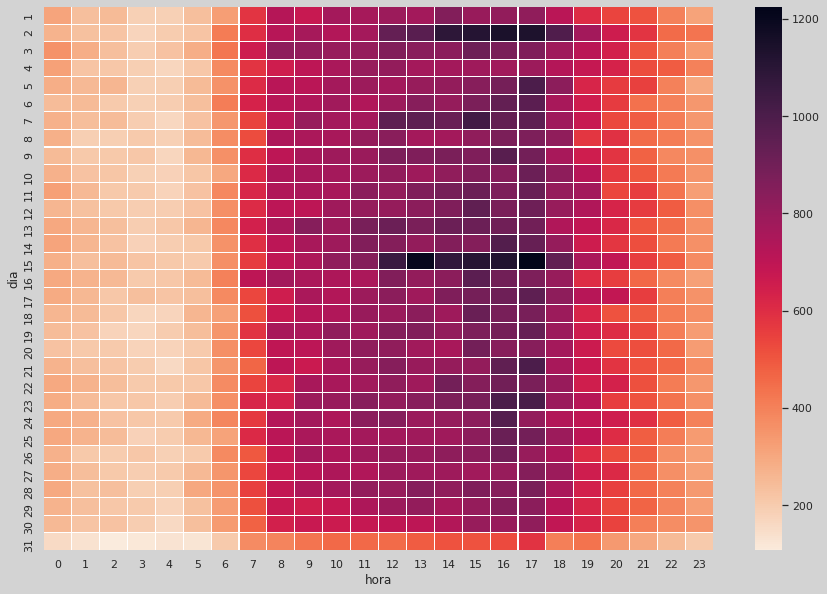

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(DayHour,cmap='rocket_r', linewidths=.1, xticklabels='auto', yticklabels='auto')

El segmento de 8hs a 18hs parece ser consistente en el diario, con dos picos muy destacables: 

* Los días 15 entre las 12hs y las 17hs. 
* Los días 2 entre las 14hs y las 17hs.

#### **Meses x Hora** 

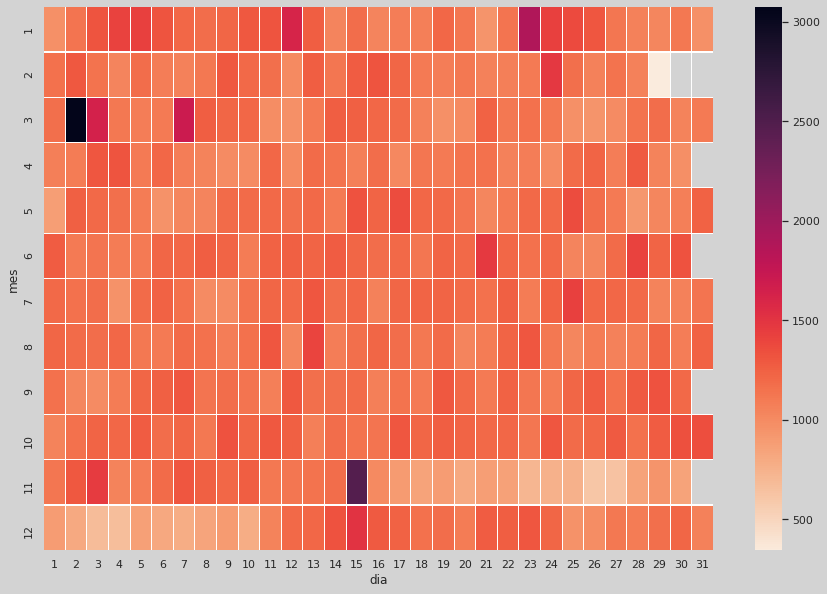

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(MonthDay,cmap='rocket_r', linewidths=.1, xticklabels='auto', yticklabels='auto')

En el plano mensual, nos encontramos con dos picos muy extremos respecto al total: 

* Los días 2 de Marzo. 
* Los días 15 de Noviembre. 

#### **Meses x Semana**

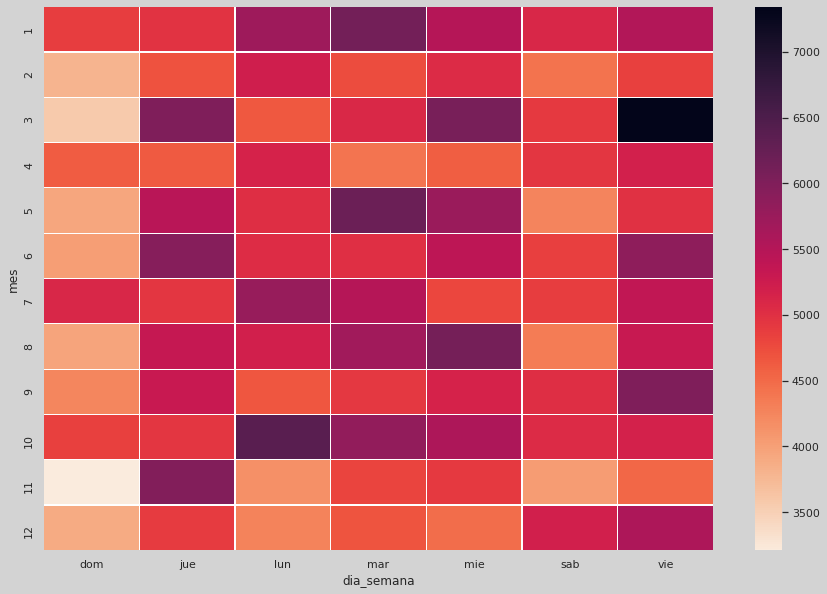

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(dayMonth,cmap='rocket_r', linewidths=.1, xticklabels='auto', yticklabels='auto')

En el plano mensual, los días viernes de marzo destacan con claridad. 

### **SECCIÓN 3: ACCIDENTES VEHICULARES Y LOWER MERION EN DETALLE**


 

#### **Accidentes Vehiculares**

In [38]:
df_vehicle_accident = pd.DataFrame(df[df['title']=='Traffic: VEHICLE ACCIDENT -'])

In [39]:
traffic_WeekHour = df.groupby(by=['dia','hora']).count()['motivo'].unstack()

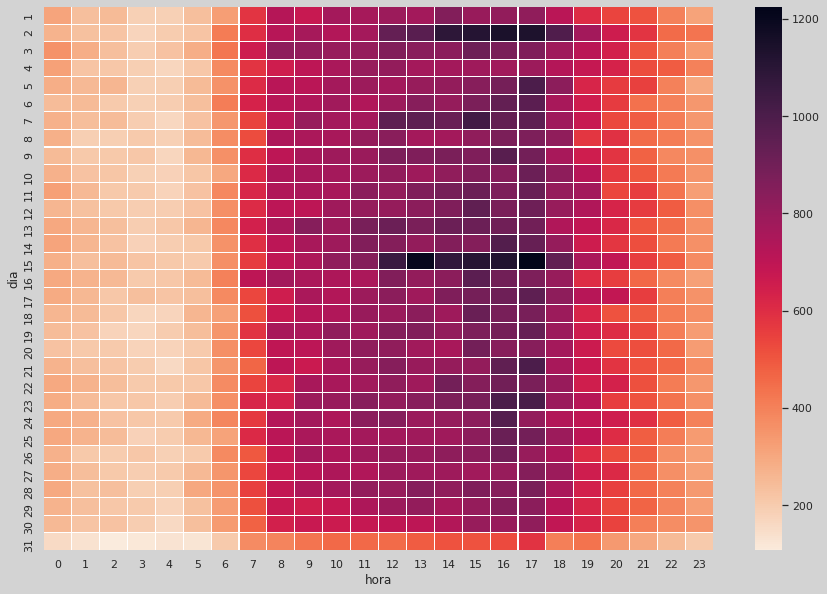

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(traffic_WeekHour,cmap='rocket_r', linewidths=.1, xticklabels='auto', yticklabels='auto')

#### **Lower Merion**

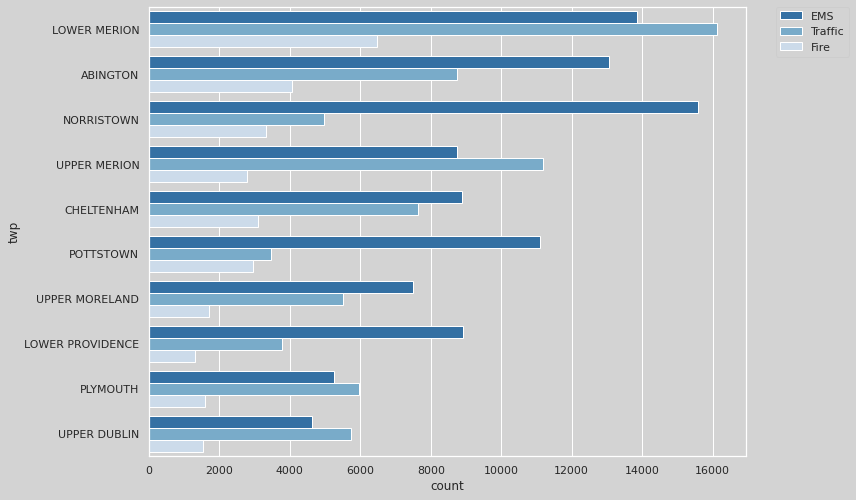

In [90]:
a4_dims = (10.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(y='twp',data=df,hue='motivo',palette='Blues_r', hue_order=hue_order, order = df_twp['Municipio'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## **CONCLUSIONES**

Finalmente, enlistamos en forma de conclusiones todos los insights obtenidos a partir del análsis de los datos. ¿Podrían llegar a ser de ayuda para el departamento de policía de Montgomery County?

1. 1 de cada 2 llamadas a la policía son por motivo de situación de emergencia médica. 
2. Los viernes son los días donde más llamadas recibe el departamento.
3. Los fines de semana presentan visiblemente menos llamadas. 
4. Enero, marzo y octubre son los meses con más llamadas. 
5. El grueso de los llamados ocurre durante el horario laboral. 
6. 1 de cada 4 llamadas al departamento son por un accidente vehicular. 
7. 6 de los 10 motivos más frecuentes de llamado son casos de emergencia médica. 
8. Las caídas y las fallas cardiorespiratorias ocupan los 3 motivos más frecuentes de llamados por situación de emergencia.
9. Las llamadas por alarma de incendio ocupan casi el 40% de los llamados por situaciones de fuego. 
10. Los 10 zipcodes y municipios que registran más llamadas cuentan por el 40% de las llamadas al departamento, respectivamente.
11. Respecto a los horarios, días y meses con más ocurrencias, podemos destacar: 

* El segmento de 8hs a 18hs los días de semana. 
* Los días 15 entre las 12hs y las 17hs. 
* Los días 2 entre las 14hs y las 17hs.
* Los días 2 de Marzo. 
* Los días 15 de Noviembre. 
* Los viernes de marzo. 


### **¿Cómo seguir?**

El análisis proporcionó muchísimos datos sobre los cuales seguir investigando, y sobre cada conclusión se puede hacer un análisis tan profundo como éste. Estas son algunas de las ideas extraídas de los datos sobre las cuales se puede seguir profundizando. 



1. Para zipcodes y municipios, sus top 10 representan el 40% de las llamadas al departamento. Uno podría adentrarse en estadísticas ya sea poblacionales como de desarrollo e infraestructura de dichos municipios/zipcodes y tratar de encontrar alguna explicación. 
20. Lower Merion presenta notablemente más incendios y accidentes de tráfico que el resto de los municipios. Sobre ese dato se puede elaborar muchísimo, buscando causas y posibles formas de mejorar la situación en el municipio más poblado de Montgomery County. 
